<a href="https://colab.research.google.com/github/sarahgottardi/prova_ds/blob/main/Data_Science_Basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Teste Cientista de Dados

Instruções básicas: Utilize um ambiente de desenvolvimento Jupyter com kernel Python 3+. Para solucionar os desafios, utilize de quaisquer bibliotecas que julgar necessário, a menos que o enunciado especifique o contrário. Fique a vontade para utilizar um ambiente de desenvolvimento local ou remoto (exemplo: Google Colab). A entrega deve ser o próprio arquivo de notebook, no seguinte padrão: nomesobrenome.ipynb

1 - Utilize o dataset existente em https://www.kaggle.com/fedesoriano/stroke-prediction-dataset como base para realizar a prova. 


In [11]:
# libs
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv
import pandas as pd
import io
import requests
import zipfile
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [12]:
pip install scikit-optimize

     |████████████████████████████████| 101 kB 3.8 MB/s 


In [13]:
!pip install lightgbm

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats as stats
from lightgbm import LGBMClassifier
import skopt

In [15]:
# lendo dados pela url ou em arquivo local
link = "https://github.com/sarahgottardi/prova_ds/blob/main/dados/healthcare-dataset-stroke-data.csv"
url = "https://github.com/sarahgottardi/prova_ds/blob/3154f28319f8766077c07978f54a67c005faa49f/dados/healthcare-dataset-stroke-data.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = 'utf8', skiprows = 10, sep = '|')
c.head(2) 

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2 - Realize uma análise exploratória, utilizando de gráficos e análises estatísticas, para indicar o comportamento dos dados, inclusive dados faltantes. Assuma o completo desconhecimento da base de dados e procure quaisquer pontos relevantes para uma futura etapa de modelagem.
Não se limite nessa análises, nos mostre o que você considera importante em uma análise exploratória.


In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
continuas = ['age', 'avg_glucose_level', 'bmi']
categorias = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status', 'stroke']
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
for coluna in categorias:
  print(df[coluna].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
0    4612
1     498
Name: hypertension, dtype: int64
0    4834
1     276
Name: heart_disease, dtype: int64
Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
0    4861
1     249
Name: stroke, dtype: int64


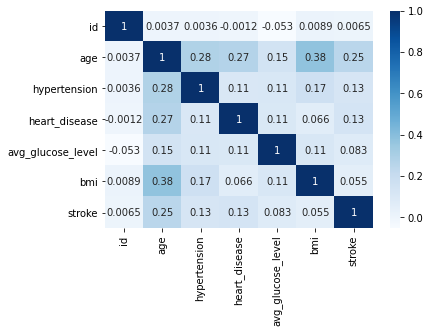

In [20]:
sns.heatmap(df.corr('spearman'), annot =True, cmap='Blues')

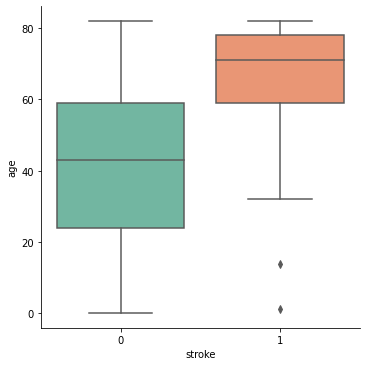

In [21]:
sns.catplot(x = 'stroke', y = 'age', kind='box', palette = 'Set2', data = df )

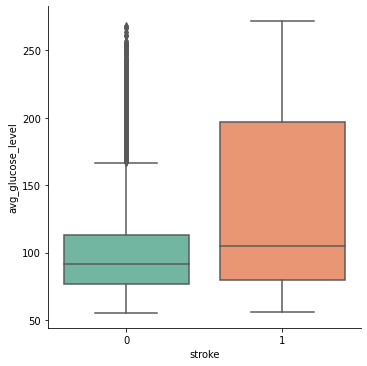

In [22]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', kind='box', palette = 'Set2', data = df )


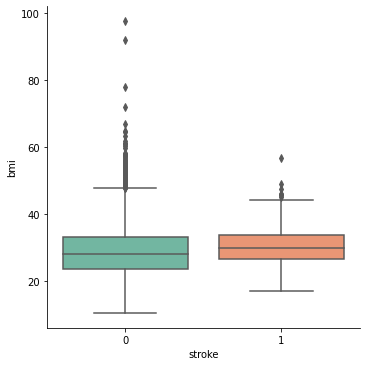

In [23]:
sns.catplot(x = 'stroke', y = 'bmi', kind='box', palette = 'Set2', data = df )

3 - Realise as etapas de pré-processamento e separação dos dados que julgar adequadas para o treinamento de um modelo de classificação binária sobre a variável alvo, utilizando todas as demais colunas do DataFrame como variáveis do modelo. 

In [24]:
# tratando nulos
when = [df.bmi.isnull(),
        df.bmi.notnull(),]
then = [-1, df.bmi]
df['bmi_2'] =   np.select(when,then, default=25)       

In [25]:
# categorizando 
when = [df.ever_married.isin(['Yes']),
        df.ever_married.isin(['No']),]
then = [1, 0]
df['ever_married_2'] =   np.select(when,then)  

# categorizando 
when = [df.gender.isin(['Female']),
        df.gender.isin(['Male']),]
then = [0, 1]
df['gender_2'] =   np.select(when,then)  

# categorizando 
when = [df.work_type.isin(['Private']),
        df.work_type.isin(['children']),
        df.work_type.isin(['Govt_job']),
        df.work_type.isin(['Never_worked']),

        ]
then = [4, 3, 2, 1]
df['work_type_2'] =   np.select(when,then)  


# categorizando 
when = [df.smoking_status.isin(['never smoked']),
        df.smoking_status.isin(['Unknown']),
        df.smoking_status.isin(['formerly smoked']),
        df.smoking_status.isin(['smokes ']),

        ]
then = [1, 2, 3, 4]
df['smoking_status_2'] =   np.select(when,then) 


In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_2,ever_married_2,gender_2,work_type_2,smoking_status_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.6,1,1,4,3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,-1.0,1,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.5,1,1,4,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.4,1,0,4,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.0,1,0,0,1


In [27]:
df.columns
df2 = df[['id', 'age', 'hypertension', 'heart_disease', 'Residence_type', 'avg_glucose_level',
          'stroke', 'bmi_2', 'ever_married_2', 'gender_2','work_type_2', 'smoking_status_2']]

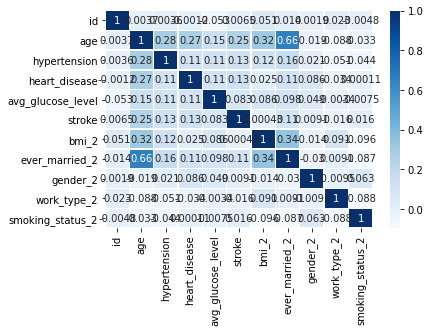

In [28]:
sns.heatmap(df2.corr('spearman'), annot =True, linewidths=.5, cmap='Blues')

4 - Apresente um gráfico 2D de dispersão dos dados de teste em relação à variável alvo. Nesteprocedimento as colunas de variáveis devem ser transformadas apenas em duas, formando os eixos X
e Y do gráfico. Para amostras com valor de "TARGET" 0 utilizar a cor azul; já para amostras de"TARGET" 1 utilizar vermelho.

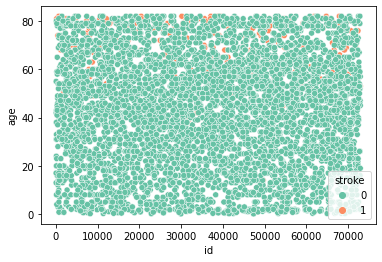

In [29]:
sns.scatterplot(x = 'id', y = 'age', hue='stroke', palette = 'Set2', data = df )

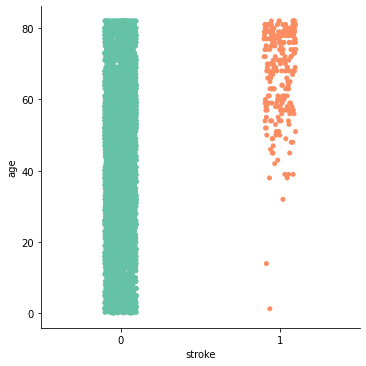

In [30]:
sns.catplot(x = 'stroke', y = 'age', hue='stroke', palette = 'Set2', data = df )

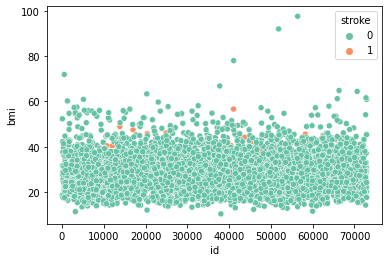

In [31]:
sns.scatterplot(x = 'id', y = 'bmi', hue='stroke', palette = 'Set2', data = df )

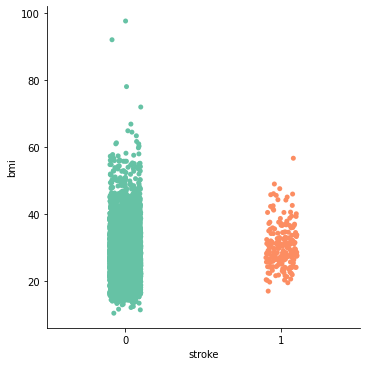

In [32]:
sns.catplot(x = 'stroke', y = 'bmi', hue='stroke', palette = 'Set2', data = df )


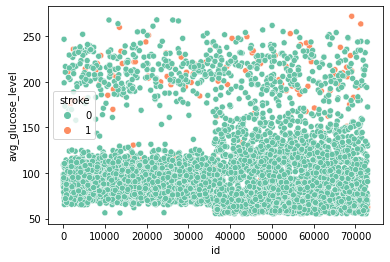

In [33]:
sns.scatterplot(x = 'id', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )

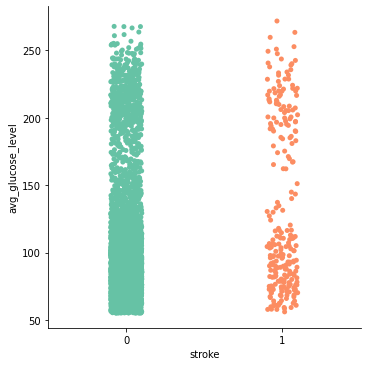

In [34]:
sns.catplot(x = 'stroke', y = 'avg_glucose_level', hue='stroke', palette = 'Set2', data = df )

5 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em árvore. Utilizeuma técnica de otimização de hiper-parametros a sua escolha.

In [35]:
df.columns 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_2', 'ever_married_2', 'gender_2',
       'work_type_2', 'smoking_status_2'],
      dtype='object')

In [36]:
target = 'stroke'
features_selecionadas = ['age', 'avg_glucose_level', 'bmi_2', 'ever_married_2', 'gender_2',
       'work_type_2', 'smoking_status_2']

In [37]:
x_treino, x_teste, y_treino, y_teste = train_test_split(df[features_selecionadas], df[target], test_size = 0.2, random_state = 13)

In [38]:
nome_parametros = ['max_depth', 'num_leaves','learning_rate', 'n_estimators', 'min_spli_gain', 'min_data_in_leaf']
parametros = [(3,8), (5, 15), (0.02, 0.5), (50,200), (0.05,0.5), (30, 200)] 

In [39]:
modelo_2 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.5, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.05,
               n_estimators=50, n_jobs=-1, num_leaves=7, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

modelo_2.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = modelo_2.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_m2'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m2']))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       972
           1       0.21      0.46      0.29        50

    accuracy                           0.89      1022
   macro avg       0.59      0.69      0.62      1022
weighted avg       0.93      0.89      0.91      1022



In [40]:
modelo_3 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.3, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.03,
               n_estimators=500, n_jobs=-1, num_leaves=7, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
modelo_3.fit(x_treino, y_treino)

y_teste_pred = modelo_3.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_m3'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m3']))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.22      0.18        50

    accuracy                           0.90      1022
   macro avg       0.56      0.58      0.57      1022
weighted avg       0.92      0.90      0.91      1022



In [41]:
modelo_1 = LGBMClassifier(random_state=17, importance_type='gain')
modelo_1.fit(x_treino, y_treino)

y_teste_pred = modelo_1.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_m1'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_m1']))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.21      0.30      0.25        50

    accuracy                           0.91      1022
   macro avg       0.59      0.62      0.60      1022
weighted avg       0.93      0.91      0.92      1022



**Os modelos estão ruins, pois o recall do stroke=1 está baixíssimo, isso significa que a otimização automatizada seria útil, ou mesmo testar outros algoritmos ou balancear a amostra de forma ao modelo dar mais importancia ao padrão da minoria. Entre os os modelos acima o melhor é o modelo_2, pois tem a melhor sensitividade**



6 - A partir dos dados da etapa 3, treine um modelo de classificação binária baseado em redes neurais.Utilize uma técnica de otimização de hiper-parametros ou busca automática de rede a sua escolha.

In [98]:

import tensorflow as tf

ann=tf.keras.Sequential()

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=25,activation='relu'))

ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#ann.compile('adam','binary_crossentropy',metrics=['accuracy'])

#ann.compile(optimizer='sgd', loss='mse', metrics=['mae', 'accuracy'])

ann.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

ann.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'accuracy'])

In [99]:
result=ann.fit(x_treino,y_treino,epochs=50)

Epoch 1/50
128/128 [==============================] - 1s 1ms/step - loss: 0.0487 - mae: 0.0487 - accuracy: 0.9513
Epoch 2/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0469 - mae: 0.0539 - accuracy: 0.9506
Epoch 3/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0478 - mae: 0.0548 - accuracy: 0.9496
Epoch 4/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0470 - mae: 0.0569 - accuracy: 0.9503
Epoch 5/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0469 - mae: 0.0598 - accuracy: 0.9496
Epoch 6/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0466 - mae: 0.0621 - accuracy: 0.9508
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0466 - mae: 0.0642 - accuracy: 0.9496
Epoch 8/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0468 - mae: 0.0610 - accuracy: 0.9508
Epoch 9/50
128/128 [==============================] - 0s 1ms/step - loss: 0.0467 - mae: 

In [100]:
from sklearn.metrics import confusion_matrix
y_pred=[]
for i in ann.predict(x_teste[features_selecionadas]):
    if i>0.5:
        y_pred.append(1)
    if i<0.5:
        y_pred.append(0)
confusion_matrix(y_teste,y_pred)

array([[970,   2],
       [ 47,   3]])

In [101]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_teste,y_pred)
accuracy

0.952054794520548

In [102]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       0.60      0.06      0.11        50

    accuracy                           0.95      1022
   macro avg       0.78      0.53      0.54      1022
weighted avg       0.94      0.95      0.93      1022



7 - A partir dos dados da etapa 3, treine um modelo utilizando qualquer técnica a sua escolha, desde queseja diferente das utilizadas nas questões 5 e 6.

In [42]:
classes = {0:1, 1:2}
rf = RandomForestClassifier(max_depth=2, random_state=0, class_weight=classes)
rf.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = rf.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_rf'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_rf']))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       972
           1       0.20      0.80      0.32        50

    accuracy                           0.84      1022
   macro avg       0.60      0.82      0.62      1022
weighted avg       0.95      0.84      0.88      1022



In [43]:
classes = {0:1, 1:2}
rf_1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=classes,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

rf_1.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = rf_1.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_rf1'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_rf1']))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       972
           1       0.22      0.74      0.33        50

    accuracy                           0.86      1022
   macro avg       0.60      0.80      0.63      1022
weighted avg       0.95      0.86      0.89      1022



In [44]:
classes = {0:1, 1:2}
rf_3 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=classes,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

rf_3.fit(x_treino[features_selecionadas], y_treino)

y_teste_pred = rf_3.predict_proba(x_teste[features_selecionadas])[:,1]

when = [y_teste_pred >= 0.15, y_teste_pred < 0.15]
then = [1,0]
x_teste['y_rf3'] = np.select(when, then)

print(classification_report(y_teste.T, x_teste['y_rf3']))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       972
           1       0.19      0.80      0.31        50

    accuracy                           0.83      1022
   macro avg       0.59      0.81      0.61      1022
weighted avg       0.95      0.83      0.87      1022



In [45]:
# Entre os 3 modelos acima eu escolheria o rf3 devido a ter uma boa acurácia geral somada  sensitividade (recall da classe 1) ser maior e mais próxima da especificidade (recall da classe 0)

**Entre os 3 modelos acima eu escolheria o rf_3 devido a ter uma boa acurácia geral somada  sensitividade (recall da classe 1) ser maior e mais próxima da especificidade (recall da classe 0)**

8 - Compare os resultados dos tres modelos acima e justifique a métrica escolhida para avaliação

**Entre todos os modelos acima, com as informações que levantei o escolhido seria o rf_3, devido a ele apresentar boa sensitividade e acurácia ao mesmo tempo. A rede neural treinada atingiu uma boa acurácia, mas o modelo não deve ser escolhido porque como mostra a matriz de confusão e o classification_report, o modelo erra muito nos casos de stroke=1, e isso não é desejável num modelo real, independente das outras serem melhores.**

**Num processo de modelagem normal eu analisaria muitas outras métricas como ks, gini, auc, estabilidade e diferença entre métricas de treino e teste, oot e base de validação para garantir que não há overfitting, apesar dos parametros escolhidos serem bons para evitar o sobreajuste, apenas na validação podemos ter segurança de que realmente o modelo está com bom poder de generalização.**

9 - Escolha um dos tres modelos acima. Supondo que um falso negativo tenha um custo muito maior doque falso positivo, e sabendo que a predição da variável alvo é realizada entre 0 e 1, mesmo em modelos de classificação binária, selecione um limiar para definir se uma pessoa terá ou não umderrame e justique a sua escolha.

**Eu já fiz essa ponderação no modelo Random Forest, informando o o peso da classe nos parâmetros ajustados. O limiar para definir positivo foi 0.150 neste caso, o que é baixo para um score tradicional. Isso acontece porque não apliquei nenhuma transformação que garantisse a normalidade da distribuição do score. Isso pode ser ajustado de forma simples aplicando uma pdo box-cox na produção do modelo final.** 

10 - Realize uma análise de "Equal Error Rate" e uma análise "SHAP" para o modelo a cima e descrevasuas conclusões.

11 - Crie uma classe que carregue o modelo treinado do disco e tenha uma função de predição. A função depredição deve receber como parâmetro uma única amostra de dados e retorne o resultado de predição(0 ou 1) utilizando o limiar definido na questão 9.

In [46]:
from scipy.stats import boxcox
def pdo(amostra):
  y = np.random.random(100)
  y_box, lambda_ = ss.boxcox(y + 1)
  rf_3.fit(x_treino[features_selecionadas], y_treino)
  #y_teste_pred = rf_3.predict_proba(x_teste[features_selecionadas])[:,1]
  
  X = np.random.random((100, 100))
  rf_3.fit(X, y_box)
  pred_box = rf_3.predict(X)
  when = [pred_box >= 0.15, pred_box < 0.15]
  then = [1,0]
  predicao_final_amostra = np.select(when, then)
  return predicao_final_amostra

12 - Disserte sobre como seria o modelo ideal para que o modelo gerado seja colocado em produção, deforma que possa ser utilizado para realizar predições em tempo real

**O modelo ideal para ser colocado em produção é um algoritmo mais simples possível com a menor quantidade de variáveis possível. Um algoritmo que seja possível ser calculado dieratamente com liguagem SQL é o melhor dos mundos. A maioria dos modelos de machine learning baseados em árvores ou redes neurais são complexos demais para serem traduzidos assim, gerando centenas de páginas de if-else.**



 **Modelos como regressão logística, regressão linear ou árvore de decisão simples são facilmente traduzíveis para o SQL, assim podem ser implantados em qualquer linguagem que tenha essa integração. As métricas de validação de modelos mais complexos facilmente superam em 5, até 10 pontos as métricas desses modelos simples, mas há formas de trabalhar os modelos simples de forma a ficarem quase tão eficientes quanto os complexos. E também há formas de simplificar os modelos complexos.**

**Uma forma de simplicar modelos complexos é reduzir a quantidade de variáveis. A analise shap pode auxiliar nessa priorização, assim como testar/otimizar diversos modelos retirando as variáveis menos importantes e comparando as métricas com os modelos mais complexos até um limite determinado de perda de informação tolerado.**

13 - Escreva uma função que receba uma lista (array) de numeros inteiros e retorne um booleano (True ouFalse) indicando se a lista é monotônica. Para essa não é permitido o uso de nenhuma biblioteca,somente a linguagem Python com seus tipos nativos.def isMonotonic(A: List[int]) -> bool:<seu código aqui>

**Para fazer essa uma função basta a partir da lista dada verificar se o próximo valor é sempre maior ou igual ao anterior ou se o primeiro valor não igual é sempre menor ou igual ao anterior. Se a regra for quebrada pelo menos uma vez não é monotônica, se a regra se mantém até o final da lista então é monotônica**

In [ ]:
def funcao_monotonica(lista):
  
    return (all(lista[i] <= lista[i + 1] for i in range(len(lista) - 1)) or
            all(lista[i] >= lista[i + 1] for i in range(len(lista) - 1)))
  
    #retornará True ou False se a regra se aplica, pasta imprimir
print(funcao_monotonica(lista))

In [104]:
lista1 = [0,1,4,9]
lista2 = [0,1,-1,9]

In [105]:
funcao_monotonica(lista1)

True

In [106]:
funcao_monotonica(lista2)

False